In [19]:
# import libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns


In [11]:
# set up URL and empty list 
url = "https://api.datacite.org/dois?resource-type-id=Instrument"

meta_data_list = []

# Loop until the end
page_number = 1
while url:
    # Make GET request to fetch the data
    response = requests.get(url)
    data = response.json()
    
    # Extract meta data and append list
    if 'meta' in data:
        meta_data_list.append(data['meta'])
    
    # Print progress
    print(f"Page {page_number} read successfully")
    
    # Get the next page URL
    if 'links' in data and 'next' in data['links']:
        url = data['links']['next']
        page_number += 1
    else:
        url = None

# Concatenate everything into on df
meta_data = pd.concat([pd.DataFrame([item]) for item in meta_data_list], ignore_index=True)

# Print head of df
print(meta_data.head())


Page 1 read successfully
Page 2 read successfully
Page 3 read successfully
   total  totalPages  page                                             states  \
0     57           3     1  [{'id': 'findable', 'title': 'Findable', 'coun...   
1     57           3     2  [{'id': 'findable', 'title': 'Findable', 'coun...   
2     57           3     3  [{'id': 'findable', 'title': 'Findable', 'coun...   

                                       resourceTypes  \
0  [{'id': 'instrument', 'title': 'Instrument', '...   
1  [{'id': 'instrument', 'title': 'Instrument', '...   
2  [{'id': 'instrument', 'title': 'Instrument', '...   

                                             created  \
0  [{'id': '2024', 'title': '2024', 'count': 33},...   
1  [{'id': '2024', 'title': '2024', 'count': 33},...   
2  [{'id': '2024', 'title': '2024', 'count': 33},...   

                                           published  \
0  [{'id': '2024', 'title': '2024', 'count': 24},...   
1  [{'id': '2024', 'title': '2024', 'c

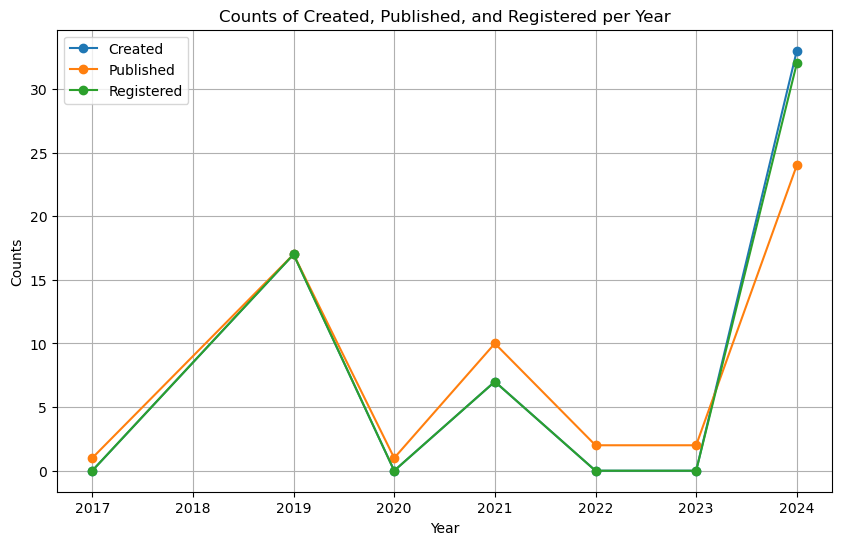

In [14]:
# Extract counts/year for "created", "published", "registered"
def extract_counts(data_list):
    counts = {}
    for item in data_list:
        year = int(item['id'])
        count = item['count']
        counts[year] = count
    return counts

# Initialize dictionaries for counts
created_counts = {}
published_counts = {}
registered_counts = {}

# Aggregate counts from all pages
for meta in meta_data_list:
    if 'created' in meta:
        created_counts.update(extract_counts(meta['created']))
    if 'published' in meta:
        published_counts.update(extract_counts(meta['published']))
    if 'registered' in meta:
        registered_counts.update(extract_counts(meta['registered']))

# Get all unique years
all_years = sorted(set(created_counts.keys()).union(published_counts.keys()).union(registered_counts.keys()))

# Prepare the data for plotting
plot_data = pd.DataFrame({
    'Year': all_years,
    'Created': [created_counts.get(year, 0) for year in all_years],
    'Published': [published_counts.get(year, 0) for year in all_years],
    'Registered': [registered_counts.get(year, 0) for year in all_years]
})

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(plot_data['Year'], plot_data['Created'], label='Created', marker='o')
plt.plot(plot_data['Year'], plot_data['Published'], label='Published', marker='o')
plt.plot(plot_data['Year'], plot_data['Registered'], label='Registered', marker='o')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Counts of Created, Published, and Registered per Year')
plt.legend()
plt.grid(True)
plt.show()

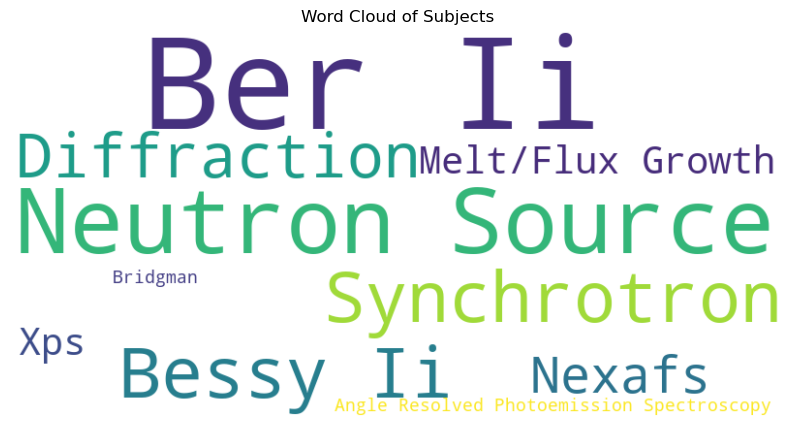

In [18]:
# Initialize a dictionary to store subjects and their counts
subject_counts = {}

# Aggregate counts for subjects from all pages
for meta in meta_data_list:
    if 'subjects' in meta:
        for subject in meta['subjects']:
            title = subject['title']
            count = subject['count']
            if title in subject_counts:
                subject_counts[title] += count
            else:
                subject_counts[title] = count

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(subject_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Subjects')
plt.show()


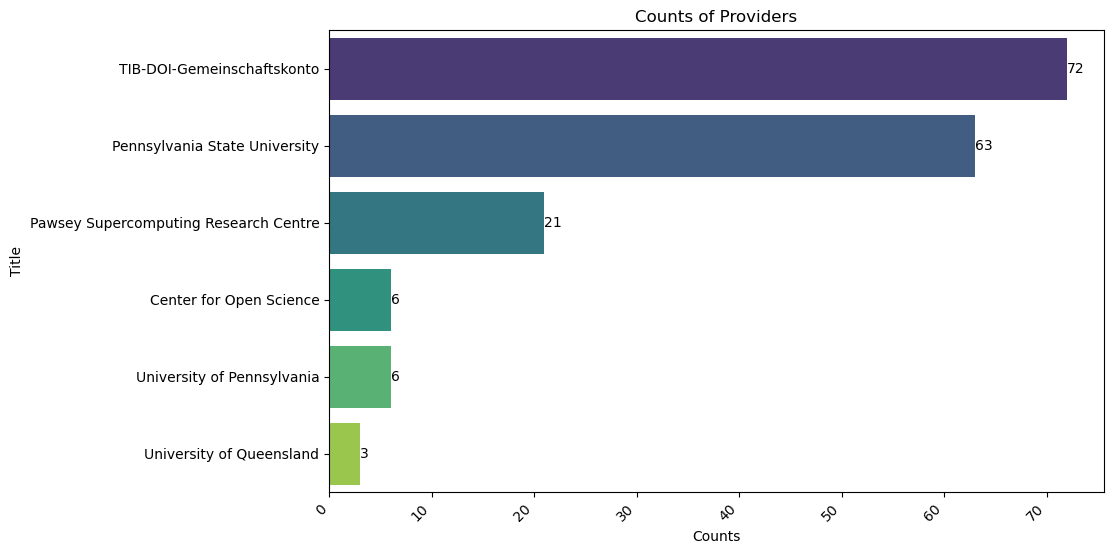

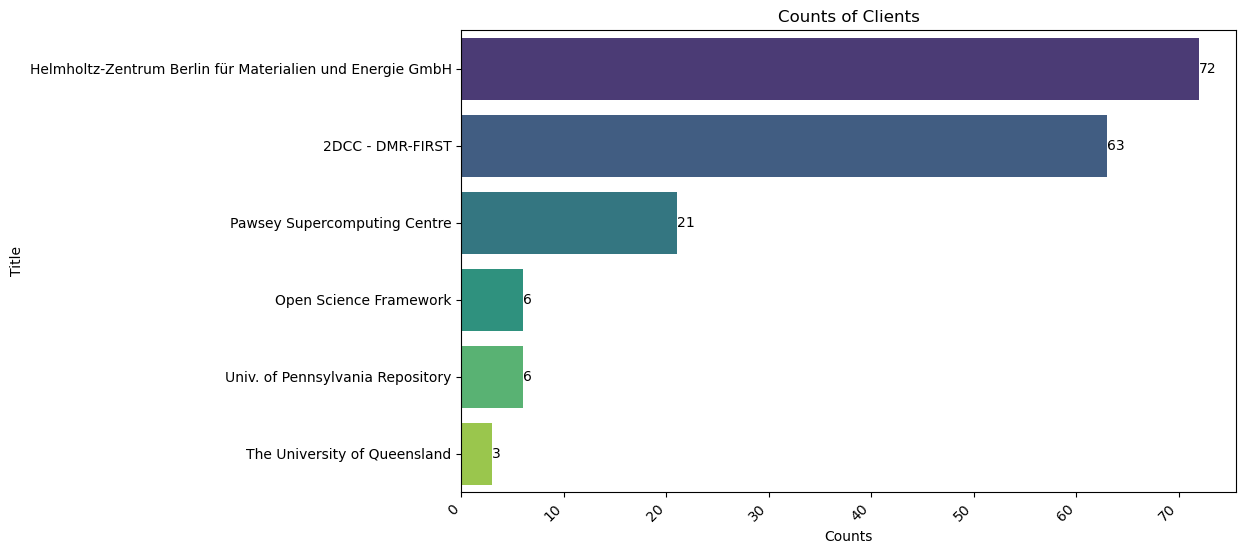

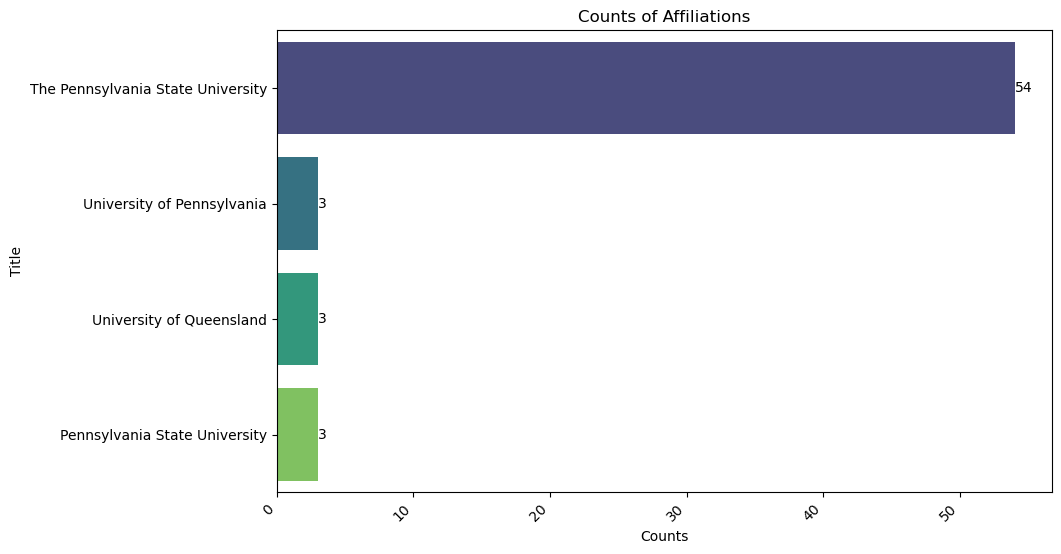

In [22]:
# Import the required libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize dictionaries to store counts for providers, clients, and affiliations
provider_counts = {}
client_counts = {}
affiliation_counts = {}

# Aggregate counts for providers, clients, and affiliations from all pages
for meta in meta_data_list:
    if 'providers' in meta:
        for provider in meta['providers']:
            title = provider['title']
            count = provider['count']
            if title in provider_counts:
                provider_counts[title] += count
            else:
                provider_counts[title] = count
    
    if 'clients' in meta:
        for client in meta['clients']:
            title = client['title']
            count = client['count']
            if title in client_counts:
                client_counts[title] += count
            else:
                client_counts[title] = count
    
    if 'affiliations' in meta:
        for affiliation in meta['affiliations']:
            title = affiliation['title']
            count = affiliation['count']
            if title in affiliation_counts:
                affiliation_counts[title] += count
            else:
                affiliation_counts[title] = count

# Function to create a bar chart with counts on the bars
def create_barchart(data, title):
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x=list(data.values()), y=list(data.keys()), palette='viridis')
    plt.xlabel('Counts')
    plt.ylabel('Title')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')

    # Add counts on top of the bars
    for index, value in enumerate(data.values()):
        barplot.text(value, index, f'{value}', color='black', ha="left", va="center")

    plt.show()

# Create and display bar charts
create_barchart(provider_counts, 'Counts of Providers')
create_barchart(client_counts, 'Counts of Clients')
create_barchart(affiliation_counts, 'Counts of Affiliations')
